In [2]:
import pandas as pd

train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
sample_submission = pd.read_csv('../data/sample_submission.csv')

print(train_df.head())



       id             model_a              model_b  \
0   30192  gpt-4-1106-preview           gpt-4-0613   
1   53567           koala-13b           gpt-4-0613   
2   65089  gpt-3.5-turbo-0613       mistral-medium   
3   96401    llama-2-13b-chat  mistral-7b-instruct   
4  198779           koala-13b   gpt-3.5-turbo-0314   

                                              prompt  \
0  ["Is it morally right to try to have a certain...   
1  ["What is the difference between marriage lice...   
2  ["explain function calling. how would you call...   
3  ["How can I create a test set for a very rare ...   
4  ["What is the best way to travel from Tel-Aviv...   

                                          response_a  \
0  ["The question of whether it is morally right ...   
1  ["A marriage license is a legal document that ...   
2  ["Function calling is the process of invoking ...   
3  ["Creating a test set for a very rare category...   
4  ["The best way to travel from Tel Aviv to Jeru...   

 

In [3]:
train_df.describe()

,id,winner_model_a,winner_model_b,winner_tie
count,5.747700e+04,57477.000000,57477.000000,57477.000000
mean,2.142564e+09,0.349079,0.341911,0.309011
std,1.238327e+09,0.476683,0.474354,0.462090
min,3.019200e+04,0.000000,0.000000,0.000000
25%,1.071821e+09,0.000000,0.000000,0.000000
50%,2.133658e+09,0.000000,0.000000,0.000000
75%,3.211645e+09,1.000000,1.000000,1.000000
max,4.294947e+09,1.000000,1.000000,1.000000


In [7]:
print(train_df.shape)  # number of rows and columns
print(train_df.columns)  # column names
train_df['winner_model_a'].value_counts()
train_df['winner_model_b'].value_counts()
train_df['winner_tie'].value_counts()

(57477, 9)
Index(['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b',
       'winner_model_a', 'winner_model_b', 'winner_tie'],
      dtype='object')


winner_tie
0    39716
1    17761
Name: count, dtype: int64

 Tie Analysis
0 = not a tie → 39,716
1 = tie → 17,761
So about 32% of the samples are ties, which means that predicting ties is an important part of doing well in this competition. We can't just ignore them!

In [8]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [9]:
import re

# Step 3.1: Define a simple text cleaning function
def clean_text(text):
    text = text.lower()  # lowercase all text
    text = re.sub(r'\s+', ' ', text.strip())  # remove extra whitespace
    return text

# Step 3.2: Combine prompt and response for model A and B, then clean
train_df['text_a'] = (train_df['prompt'] + " " + train_df['response_a']).apply(clean_text)
train_df['text_b'] = (train_df['prompt'] + " " + train_df['response_b']).apply(clean_text)

In [10]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,text_a,text_b
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,"[""is it morally right to try to have a certain...","[""is it morally right to try to have a certain..."
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,"[""what is the difference between marriage lice...","[""what is the difference between marriage lice..."
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,"[""explain function calling. how would you call...","[""explain function calling. how would you call..."
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,"[""how can i create a test set for a very rare ...","[""how can i create a test set for a very rare ..."
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,"[""what is the best way to travel from tel-aviv...","[""what is the best way to travel from tel-aviv..."


In [11]:
#Step 4: Convert Text to Vectors Using TF-IDF
#Machine learning models can't understand raw text — they need numerical features.
from sklearn.feature_extraction.text import TfidfVectorizer


In [12]:
#you can think of this like building a vocabulary of 5000 words that matter most across your data.
tfidf = TfidfVectorizer(max_features=5000)

#combine all text
all_text = pd.concat([train_df['text_a'], train_df['text_b']])
tfidf.fit(all_text)

TfidfVectorizer(max_features=5000)

In [ ]:
#Transform Text_a and Text_b into Vectors
# transform() takes each response and gives you a sparse matrix (efficient storage of big data).
# Each row becomes a vector of length 5000.
# X_a[i] = TF-IDF vector for prompt + response A of row i
# X_b[i] = TF-IDF vector for prompt + response B of row i
X_a = tfidf.transform(train_df['text_a'])
X_b = tfidf.transform(train_df['text_b'])

print(X_a.shape)  
print(X_b.shape) 

(57477, 5000)
(57477, 5000)


In [14]:
tfidf.get_feature_names_out()[:20]  # show first 20 words in the vocabulary


array(['00', '000', '01', '02', '03', '04', '05', '06', '07', '0d', '10',
       '100', '1000', '11', '12', '120', '13', '14', '15', '150'],
      dtype=object)

In [17]:
import numpy as np
# Pick one row (e.g., first response A)
row_index = 4
vector = X_a[row_index]

# Convert to dense array (only for display, not for real model use!)
dense_vec = vector.toarray().flatten()

# Show words with non-zero TF-IDF weights
non_zero_indices = np.where(dense_vec > 0)[0]
for idx in non_zero_indices[:10]:  # Show first 10 non-zero entries
    print(f"{tfidf.get_feature_names_out()[idx]}: {dense_vec[idx]:.4f}")

30: 0.1081
37: 0.0786
45: 0.0702
60: 0.0639
about: 0.0282
airport: 0.1689
all: 0.0308
and: 0.1253
another: 0.0452
are: 0.1547


In [19]:
def get_label(row):
    if row['winner_model_a'] == 1:
        return 'a'
    elif row['winner_model_b'] == 1:
        return 'b'
    else:
        return 'tie'

train_df['label'] = train_df.apply(get_label, axis=1)

train_df['label'].value_counts()

label
a      20064
b      19652
tie    17761
Name: count, dtype: int64

In [20]:
train_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,text_a,text_b,label
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0,"[""is it morally right to try to have a certain...","[""is it morally right to try to have a certain...",a
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0,"[""what is the difference between marriage lice...","[""what is the difference between marriage lice...",b
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1,"[""explain function calling. how would you call...","[""explain function calling. how would you call...",tie
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0,"[""how can i create a test set for a very rare ...","[""how can i create a test set for a very rare ...",a
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0,"[""what is the best way to travel from tel-aviv...","[""what is the best way to travel from tel-aviv...",b


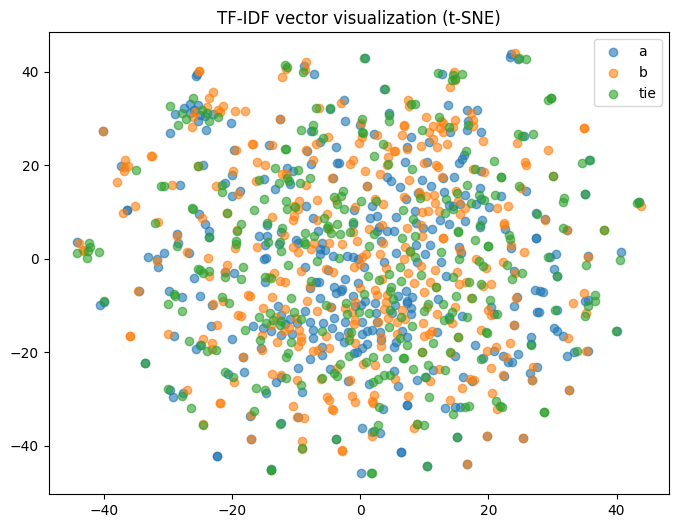

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Take a sample (optional: small subset to make it fast)
sample_indices = train_df.sample(1000, random_state=42).index
sample_vectors = X_a[sample_indices]
sample_labels = train_df.loc[sample_indices, 'label']

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(sample_vectors.toarray())

# Plot
plt.figure(figsize=(8,6))
for label in ['a', 'b', 'tie']:
    idx = sample_labels == label
    plt.scatter(X_tsne[idx, 0], X_tsne[idx, 1], label=label, alpha=0.6)

plt.title("TF-IDF vector visualization (t-SNE)")
plt.legend()
plt.show()


In [22]:
#Train & Evaluate a Logistic Regression Model
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# Step 5.1: Combine vectors by subtracting (captures differences between responses)
X_diff = X_a - X_b

# Step 5.2: Set target labels
y = train_df['label']

# Step 5.3: Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X_diff, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5.4: Train the Logistic Regression model
model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# Step 5.5: Evaluate the model
y_pred = model.predict(X_val)

print("\n✅ Classification Report:")
print(classification_report(y_val, y_pred))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print(f"\n🎯 Overall Accuracy: {accuracy_score(y_val, y_pred):.4f}")

C:\Users\adixb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



✅ Classification Report:
              precision    recall  f1-score   support

           a       0.44      0.51      0.47      4013
           b       0.43      0.48      0.46      3931
         tie       0.32      0.22      0.26      3552

    accuracy                           0.41     11496
   macro avg       0.40      0.40      0.39     11496
weighted avg       0.40      0.41      0.40     11496


🧱 Confusion Matrix:
[[2052 1150  811]
 [1210 1891  830]
 [1451 1329  772]]

🎯 Overall Accuracy: 0.4101


In [24]:
#Maybe the model wants to "see" both responses, not just the difference.
from scipy.sparse import hstack

X_concat = hstack([X_a, X_b])

# Step 5.2: Set target labels
y = train_df['label']

# Step 5.3: Train/Validation Split
X_train, X_val, y_train, y_val = train_test_split(
    X_concat, y, test_size=0.2, random_state=42, stratify=y
)

# Step 5.4: Train the Logistic Regression model
model = LogisticRegression(
    multi_class='multinomial',
    solver='saga',
    max_iter=1000,
    random_state=42
)
model.fit(X_train, y_train)

# Step 5.5: Evaluate the model
y_pred = model.predict(X_val)

print("\n✅ Classification Report:")
print(classification_report(y_val, y_pred))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))

print(f"\n🎯 Overall Accuracy: {accuracy_score(y_val, y_pred):.4f}")

C:\Users\adixb\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



✅ Classification Report:
              precision    recall  f1-score   support

           a       0.44      0.47      0.46      4013
           b       0.43      0.43      0.43      3931
         tie       0.39      0.35      0.37      3552

    accuracy                           0.42     11496
   macro avg       0.42      0.42      0.42     11496
weighted avg       0.42      0.42      0.42     11496


🧱 Confusion Matrix:
[[1891 1139  983]
 [1232 1705  994]
 [1166 1133 1253]]

🎯 Overall Accuracy: 0.4218


Conclusion: Concatenating features helped your model understand the "tie" class much better — because it's seeing both responses in full, not just their difference. This makes sense because:

A tie isn't about contrast, it's about similarity or equal quality.

In [ ]:
# Step 0: Install XGBoost (if needed)
# !pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Encode labels ('a', 'b', 'tie' → 0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(train_df['label'])

# Step 2: Split data
X_train, X_val, y_train, y_val = train_test_split(
    X_concat, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 3: Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Step 4: Define training parameters
params = {
    'objective': 'multi:softmax',  # multi-class classification
    'num_class': 3,                # labels: a, b, tie
    'eval_metric': 'mlogloss',     # standard for multi-class
    'max_depth': 4,                # controls tree complexity
    'eta': 0.3,                    # learning rate
    'tree_method': 'hist',         # faster training with sparse TF-IDF
    'verbosity': 1
}

# Step 5: Train model (adjust num_boost_round as needed)
bst = xgb.train(params, dtrain, num_boost_round=100)

# Step 6: Predict on validation set
y_pred = bst.predict(dval).astype(int)  # XGBoost returns float labels

# Step 7: Decode labels back to 'a', 'b', 'tie' for reporting
y_val_labels = le.inverse_transform(y_val)
y_pred_labels = le.inverse_transform(y_pred)

# Step 8: Evaluate performance
print("\n✅ Classification Report:")
print(classification_report(y_val_labels, y_pred_labels))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_val_labels, y_pred_labels))

print(f"\n🎯 Accuracy: {accuracy_score(y_val_labels, y_pred_labels):.4f}")



✅ Classification Report:
              precision    recall  f1-score   support

           a       0.46      0.54      0.50      4013
           b       0.48      0.52      0.50      3931
         tie       0.44      0.31      0.37      3552

    accuracy                           0.46     11496
   macro avg       0.46      0.46      0.46     11496
weighted avg       0.46      0.46      0.46     11496


🧱 Confusion Matrix:
[[2185 1126  702]
 [1181 2042  708]
 [1334 1102 1116]]

🎯 Accuracy: 0.4648


 What likely helped:
Using XGBoost instead of logistic regression

Switching to TF-IDF concatenation

Possibly using better-balanced tree settings

In [29]:
# Step 0: Install XGBoost (if needed)
# !pip install xgboost

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Encode labels ('a', 'b', 'tie' → 0, 1, 2)
le = LabelEncoder()
y_encoded = le.fit_transform(train_df['label'])

# Step 2: Split data
X_train, X_val, y_train, y_val = train_test_split(
    X_concat, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Step 3: Create XGBoost DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# Step 4: Define training parameters
params = {
    'objective': 'multi:softmax',
    'num_class': 3,
    'eval_metric': 'mlogloss',
    'max_depth': 8,             # Try 5, 6, 7, or 8
    'eta': 0.01,                 # Try 0.05 or 0.01 for slower but better learning
    'subsample': 0.8,           # Try 0.7–1.0
    'colsample_bytree': 0.8,    # Use 80% of features per tree
    'tree_method': 'hist',
    'verbosity': 1
}


# Use early stopping to prevent overfitting
evals = [(dtrain, 'train'), (dval, 'val')]
bst = xgb.train(
    params,
    dtrain,
    num_boost_round=500,           # Large number with early stopping
    evals=evals,
    early_stopping_rounds=20,      # Stop if no improvement for 20 rounds
    verbose_eval=10                # Print every 10 rounds
)

# Step 6: Predict on validation set
y_pred = bst.predict(dval).astype(int)  # XGBoost returns float labels

# Step 7: Decode labels back to 'a', 'b', 'tie' for reporting
y_val_labels = le.inverse_transform(y_val)
y_pred_labels = le.inverse_transform(y_pred)

# Step 8: Evaluate performance
print("\n✅ Classification Report:")
print(classification_report(y_val_labels, y_pred_labels))

print("\n🧱 Confusion Matrix:")
print(confusion_matrix(y_val_labels, y_pred_labels))

print(f"\n🎯 Accuracy: {accuracy_score(y_val_labels, y_pred_labels):.4f}")

[0]	train-mlogloss:1.09778	val-mlogloss:1.09816
[10]	train-mlogloss:1.08967	val-mlogloss:1.09418
[20]	train-mlogloss:1.08214	val-mlogloss:1.09060
[30]	train-mlogloss:1.07498	val-mlogloss:1.08738
[40]	train-mlogloss:1.06838	val-mlogloss:1.08452
[50]	train-mlogloss:1.06201	val-mlogloss:1.08176
[60]	train-mlogloss:1.05587	val-mlogloss:1.07936
[70]	train-mlogloss:1.04998	val-mlogloss:1.07716
[80]	train-mlogloss:1.04434	val-mlogloss:1.07506
[90]	train-mlogloss:1.03883	val-mlogloss:1.07316
[100]	train-mlogloss:1.03339	val-mlogloss:1.07140
[110]	train-mlogloss:1.02840	val-mlogloss:1.06979
[120]	train-mlogloss:1.02349	val-mlogloss:1.06829
[130]	train-mlogloss:1.01880	val-mlogloss:1.06689
[140]	train-mlogloss:1.01445	val-mlogloss:1.06556
[150]	train-mlogloss:1.00997	val-mlogloss:1.06429
[160]	train-mlogloss:1.00576	val-mlogloss:1.06325
[170]	train-mlogloss:1.00160	val-mlogloss:1.06219
[180]	train-mlogloss:0.99733	val-mlogloss:1.06118
[190]	train-mlogloss:0.99342	val-mlogloss:1.06025
[200]	train

In [30]:
test_df = pd.read_csv('../data/test.csv')

# Clean text and join prompt + responses
test_df['text_a'] = (test_df['prompt'] + " " + test_df['response_a']).str.lower().str.strip()
test_df['text_b'] = (test_df['prompt'] + " " + test_df['response_b']).str.lower().str.strip()

# Vectorize using fitted TF-IDF model
X_test_a = tfidf.transform(test_df['text_a'])
X_test_b = tfidf.transform(test_df['text_b'])

# Use the same strategy as training — TF-IDF concatenation
X_test_concat = hstack([X_test_a, X_test_b])


dtest = xgb.DMatrix(X_test_concat)
y_test_pred = bst.predict(dtest).astype(int)  # convert float labels to int

# Decode labels back to 'a', 'b', or 'tie'
y_test_labels = le.inverse_transform(y_test_pred)

submission_df = pd.DataFrame({
    'id': test_df['id'],
    'winner_model': y_test_labels
})

# Make sure it’s named exactly as required
submission_df.columns = ['id', 'winner_model_a/b/tie']

# Save the CSV
submission_df.to_csv('submission.csv', index=False)
print("✅ Submission file 'submission.csv' created successfully.")

submission_df.head()

✅ Submission file 'submission.csv' created successfully.


,id,winner_model_a/b/tie
0,136060,tie
1,211333,a
2,1233961,b
